### ДЕРЕВЬЯ РЕШЕНИЙ В SKLEARN

In [40]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model
from sklearn import tree # импортируем бибилиотеку дерево решений
from sklearn import metrics #метрики


import warnings # для игнорирования предупреждений
#Игнорируем предупреждения
warnings.filterwarnings('ignore')


# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [2]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()
df = diabetes_data.copy()

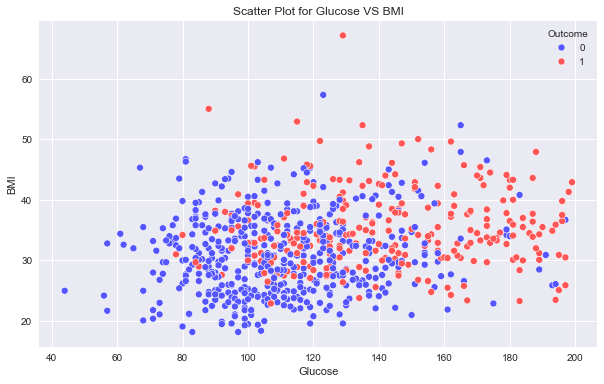

In [3]:
# диаграмма рессеяния Уровень глюкозы к Индексу массы тела
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=df, # дата-сет
    x='Glucose', # ось Х
    y='BMI', # ось Y
    hue='Outcome', # по какому признаку группировка
    palette='seismic', # палитра
    ax=ax # координатная плоскость
)
ax.set_title('Scatter Plot for Glucose VS BMI'); # наименование графика

Создадим матрицу наблюдений X из признаков Glucose и BMI и столбец с правильными ответами y из признака Outcome:

In [6]:
X = df[['Glucose', 'BMI']]
y = df['Outcome']

In [7]:
# Создаём объект класс DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier( #обучаем на двух признаках
    criterion='entropy', # критерий информативности
    max_depth=3, # максимальная глубина
    random_state=42
)
# обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

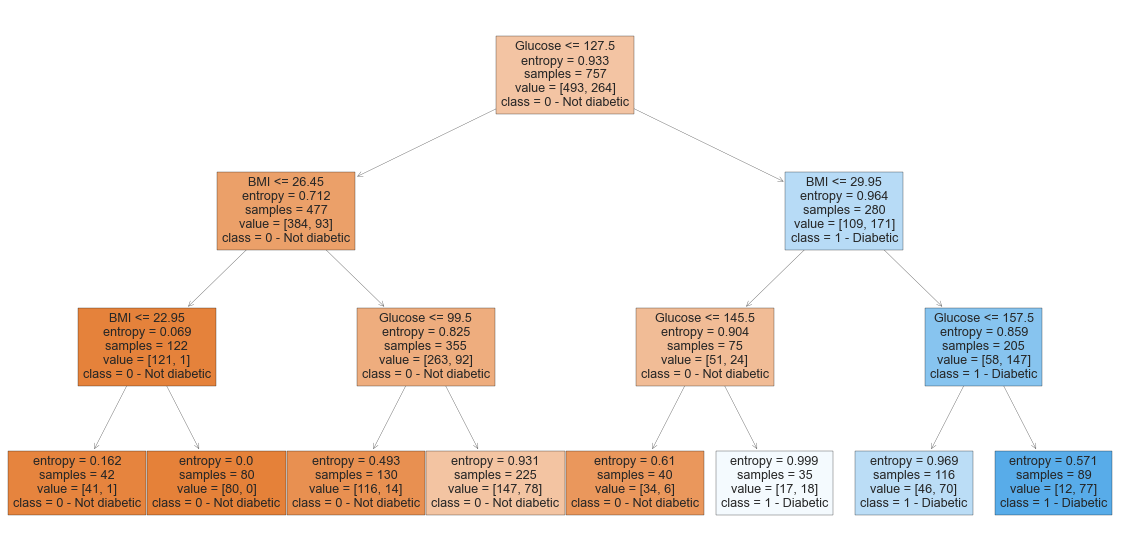

In [12]:
# Строим визуализацию дерева решений
fig = plt.figure(figsize=(20, 10))

# Строим граф дерева решений
tree.plot_tree(
    dt_clf_2d,
    feature_names=X.columns,
    class_names=['0 - Not diabetic', '1 - Diabetic'],
    filled=True
);

plt.show()

In [15]:
# предсказание класса для нового пациента
x_new = [[180, 51]] # данные пациента по клюкозе и индексу массы тела
y_new_predict = dt_clf_2d.predict(x_new) # предсказываем класс 0 или 1
y_new_proba_predict = dt_clf_2d.predict_proba(x_new) # предсказываем вероятности принадлежности к классу
print(f'Predicted class {y_new_predict}')
print(f'Predicted probabilities {np.round (y_new_proba_predict, 3)}')

Predicted class [1]
Predicted probabilities [[0.135 0.865]]


In [18]:
# Функция визуализации разделяющих поверхностей

def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (20, 10))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

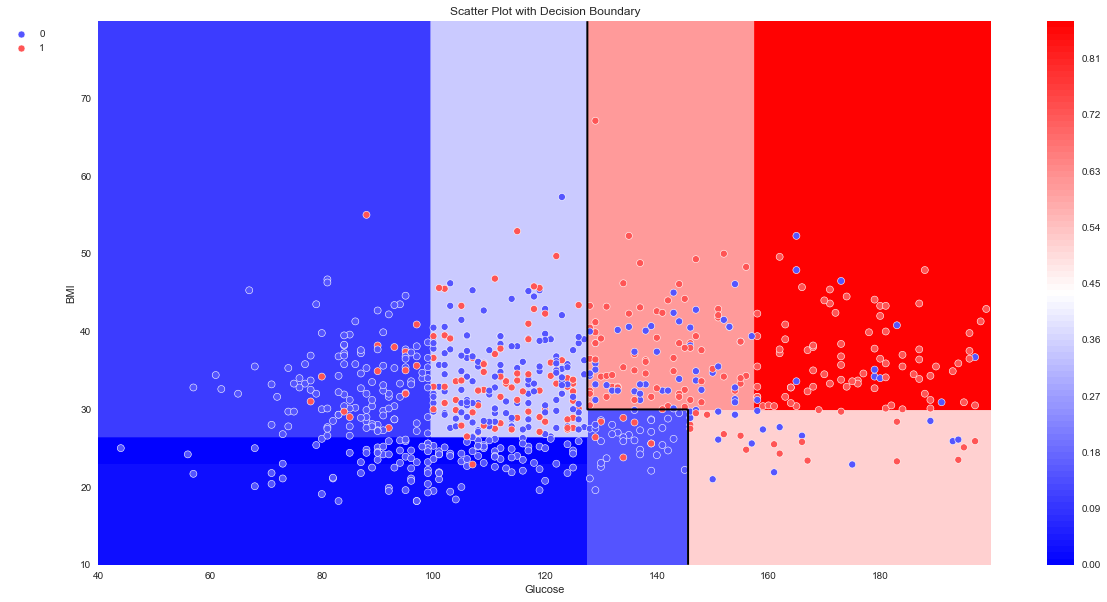

In [19]:
# вызываем функцию визуализации
plot_probabilities_2d(X, y, dt_clf_2d)

In [22]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_2d.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



Построим дерево решений без ограничения максимальной глубины $max$ _ $depth$

In [28]:
# Создаём объект класс DecisionTreeClassifier
dt_clf_bad = tree.DecisionTreeClassifier( #обучаем на двух признаках
    criterion='entropy', # критерий информативности
    #max_depth=3, # максимальная глубина
    random_state=42
)
# обучаем дерево решений по алгоритму CART
dt_clf_bad.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [29]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_bad.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



Очень высокие значения метрик - модель переучена.

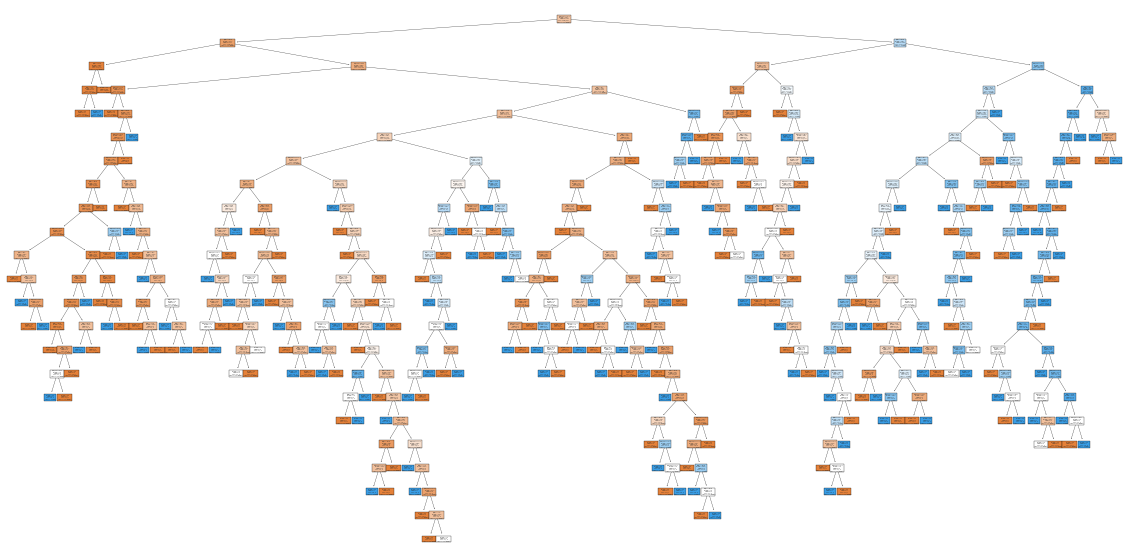

In [30]:
# Строим визуализацию дерева решений
fig = plt.figure(figsize=(20, 10))

# Строим граф дерева решений
tree.plot_tree(
    dt_clf_bad,
    feature_names=X.columns,
    class_names=['0 - Not diabetic', '1 - Diabetic'],
    filled=True
);

plt.show()

Большая глубина.

In [32]:
# возвращаем значение глубины дерева
dt_clf_bad.get_depth()

22

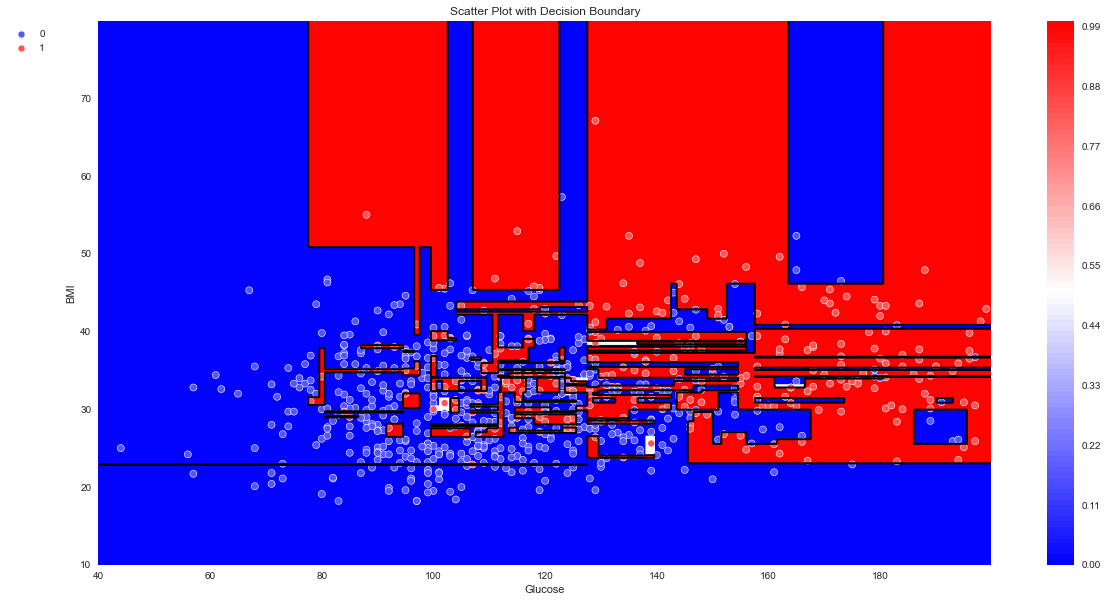

In [33]:
# вызываем функцию визуализации
plot_probabilities_2d(X, y, dt_clf_bad)

Дерево решений разделило пространство на огромное количество отдельных частей, чтобы обозначить все точки из обучающего набора данных правильным классом (уменьшить энтропию до нуля). Модель переучена.

#### Обучим модель на всех признаках

In [34]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [43]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       493
           1       0.84      0.69      0.76       264

    accuracy                           0.85       757
   macro avg       0.84      0.81      0.82       757
weighted avg       0.84      0.85      0.84       757



Метрики лучше, чем у модели, построенной на двух признаках.

Определим важность признаков для дерева решений

In [36]:
# вернем коэффициенты важности признаком для модели
print(dt_clf_full.feature_importances_)

[0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465
 0.14000868]


Визуализируем важность признаков на столбчатой диаграмме

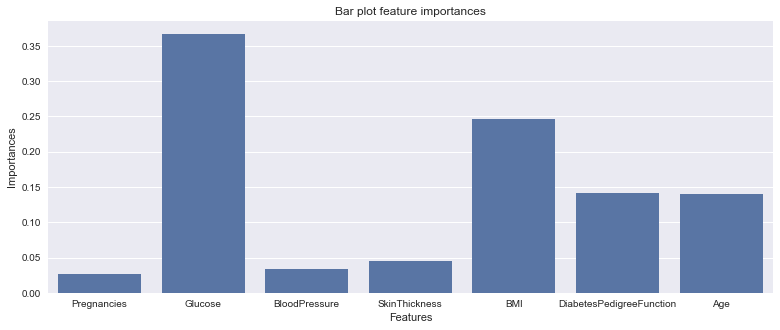

In [41]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = dt_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

Эту информацию можно использовать для интерпретации значимости каждого из признаков для предсказания